<a href="https://colab.research.google.com/github/LeticiaPaesano/Analise-de-vendas-de-cafe/blob/main/C%C3%B3pia_de_An%C3%A1lise_de_Vendas_de_Caf%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar bibliotecas
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
uploaded = files.upload()
data = pd.read_csv('/content/venda.cafe.csv')

# Exibir as primeiras linhas do dataset e as colunas
print(data.head())
print(data.columns)

# Converter a coluna 'datetime' para o tipo datetime
data['datetime'] = pd.to_datetime(data['datetime'])

# Exibir informações do dataset após a limpeza inicial
print(data.info())

# Verificar valores ausentes
print(data.isnull().sum())


# Converter a coluna 'datetime' para o tipo datetime
data['datetime'] = pd.to_datetime(data['datetime'])

# Exibir informações do dataset após a limpeza inicial
print(data.info())

Saving venda.cafe.csv to venda.cafe (11).csv
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  
Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         976 non-null    object        
 1   datetime     97

In [ ]:
# Agrupar os dados pelo nome do café e somar as vendas
coffee_sales = data.groupby('coffee_name')['money'].sum().reset_index()

# Ordenar os dados pelo valor total de vendas em ordem decrescente
coffee_sales = coffee_sales.sort_values(by='money', ascending=False)

# Exibir o café mais vendido
print("Café mais vendido:")
print(coffee_sales.head(1))

# Exibir uma tabela com todos os cafés ordenados pelo total de vendas
print("Total de vendas por café:")
print(coffee_sales)


Café mais vendido:
  coffee_name    money
7       Latte  7696.34
Total de vendas por café:
           coffee_name    money
7                Latte  7696.34
1  Americano with Milk  7457.22
2           Cappuccino  6709.56
0            Americano  4092.06
6        Hot Chocolate  2680.02
4              Cortado  2445.82
3                Cocoa  1066.20
5             Espresso   919.42


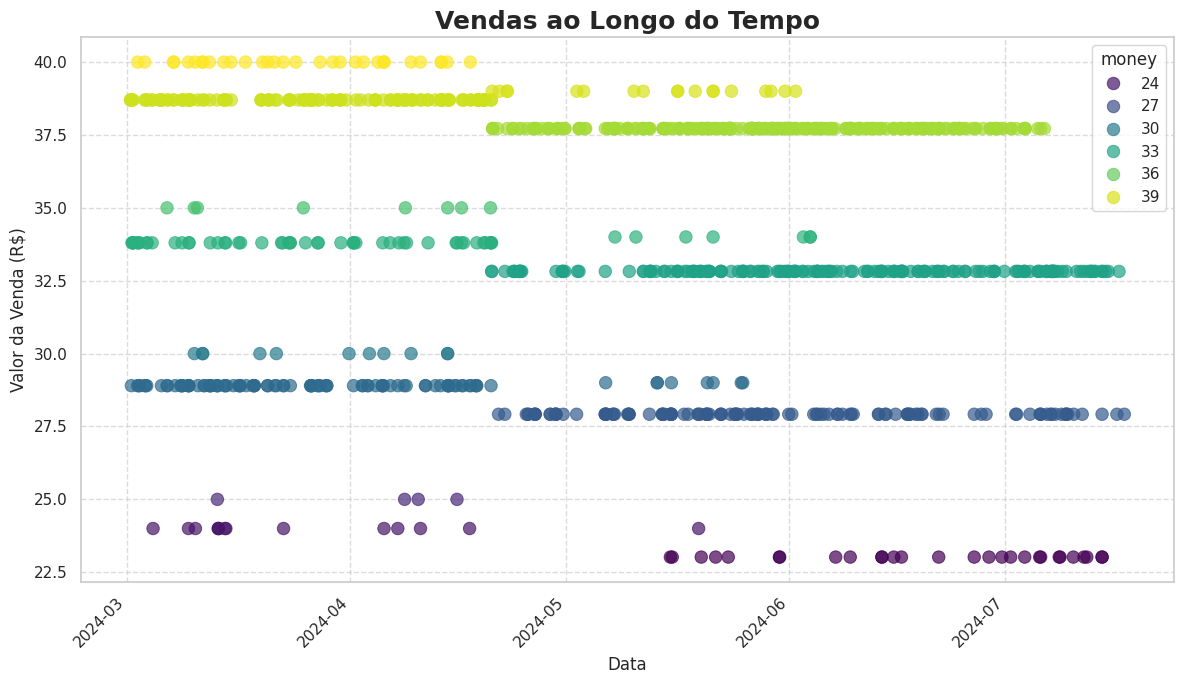

In [ ]:
# Gráfico de dispersão para vendas ao longo do tempo
plt.figure(figsize=(12, 7))
sns.scatterplot(data=data, x='datetime', y='money', hue='money', palette='viridis', s=80, alpha=0.7, edgecolor=None)

# Adicionar título e rótulos dos eixos
plt.title('Vendas ao Longo do Tempo', fontsize=18, weight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor da Venda (R$)', fontsize=12)

# Melhorar a visibilidade das datas no eixo x
plt.xticks(rotation=45, ha='right')

# Adicionar grade
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

plt.show()

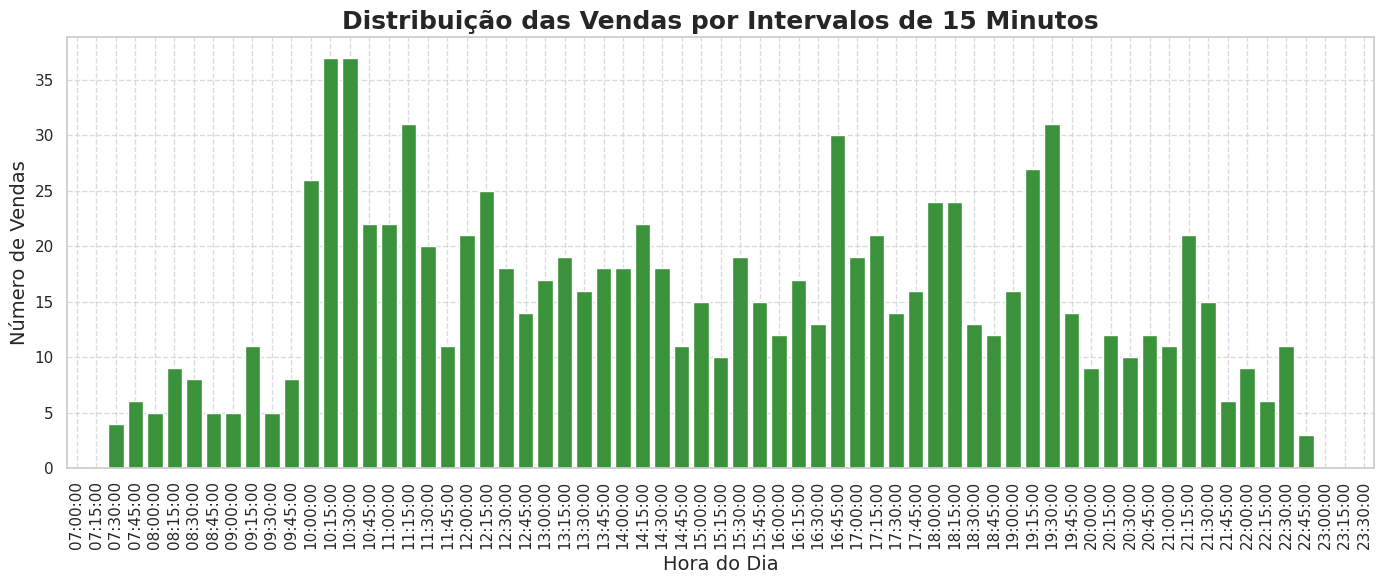

In [ ]:
# Visualizando a distribuição das vendas por intervalo de 15 minutos
plt.figure(figsize=(14, 6))
sns.barplot(data=df_by_hour, x="time", y="count", color="#2ca02c")
plt.xticks(rotation=90)
plt.title('Distribuição das Vendas por Intervalos de 15 Minutos', fontsize=18, weight='bold')
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Número de Vendas', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-109-895ac544a2c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='day_of_week', y='money', palette=colors)
<ipython-input-109-895ac544a2c0>:4: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=data, x='day_of_week', y='money', palette=colors)


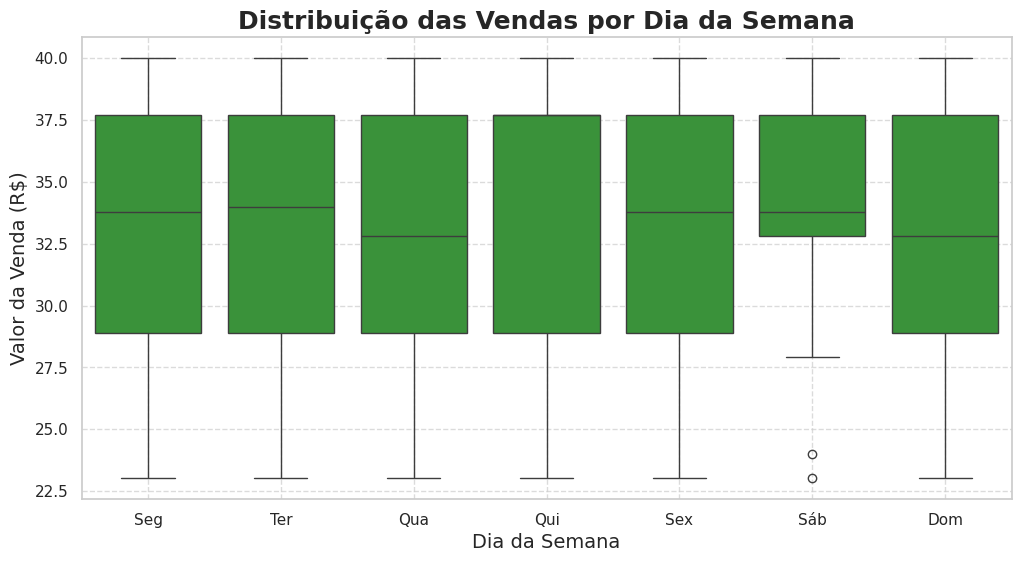

In [ ]:
# Distribuição das Vendas por Dia da Semana
data['day_of_week'] = data['datetime'].dt.dayofweek
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='day_of_week', y='money', palette=colors)
plt.title('Distribuição das Vendas por Dia da Semana', fontsize=18, weight='bold')
plt.xlabel('Dia da Semana', fontsize=14)
plt.ylabel('Valor da Venda (R$)', fontsize=14)
plt.xticks(ticks=range(7), labels=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<ipython-input-110-10f3f46598cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='month', y='money', palette=colors)
<ipython-input-110-10f3f46598cb>:4: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=data, x='month', y='money', palette=colors)


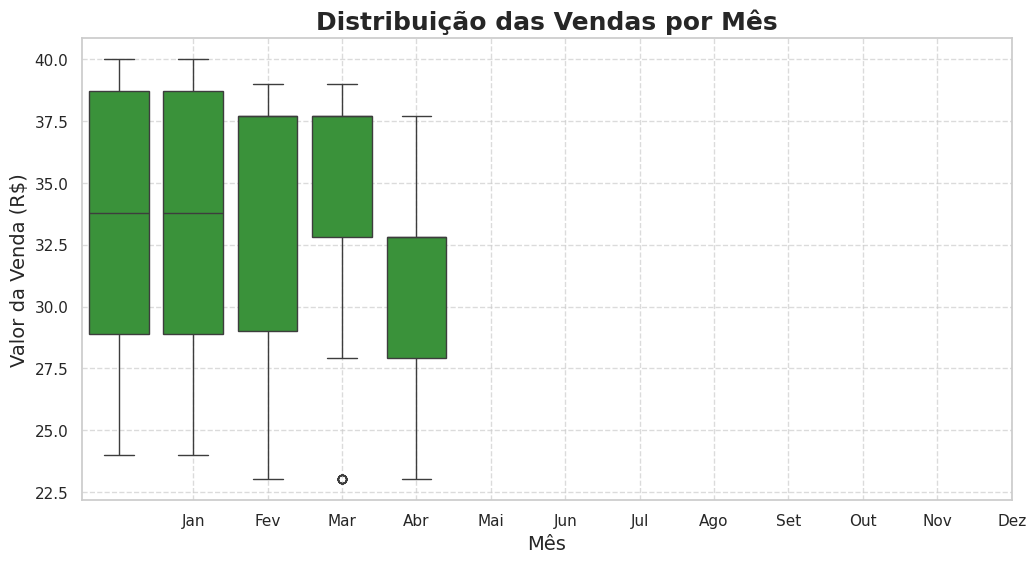

In [ ]:
# Distribuição das Vendas por Mês
data['month'] = data['datetime'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='month', y='money', palette=colors)
plt.title('Distribuição das Vendas por Mês', fontsize=18, weight='bold')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Valor da Venda (R$)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

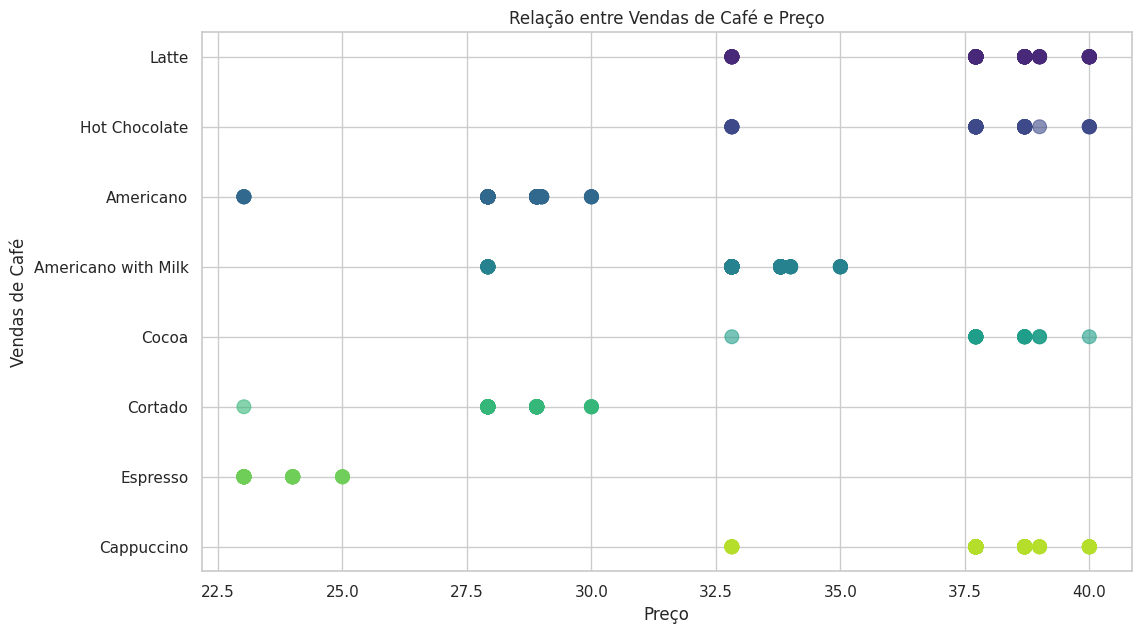

In [ ]:
#Relação entre Vendas de Café e Preço
plt.figure(figsize=(12, 7))
sns.scatterplot(data=data, x='money', y='coffee_name', hue='coffee_name', palette='viridis', s=100, alpha=0.6, edgecolor=None, legend=False)
plt.title('Relação entre Vendas de Café e Preço')
plt.xlabel('Preço')
plt.ylabel('Vendas de Café')
plt.grid(True)
plt.show()

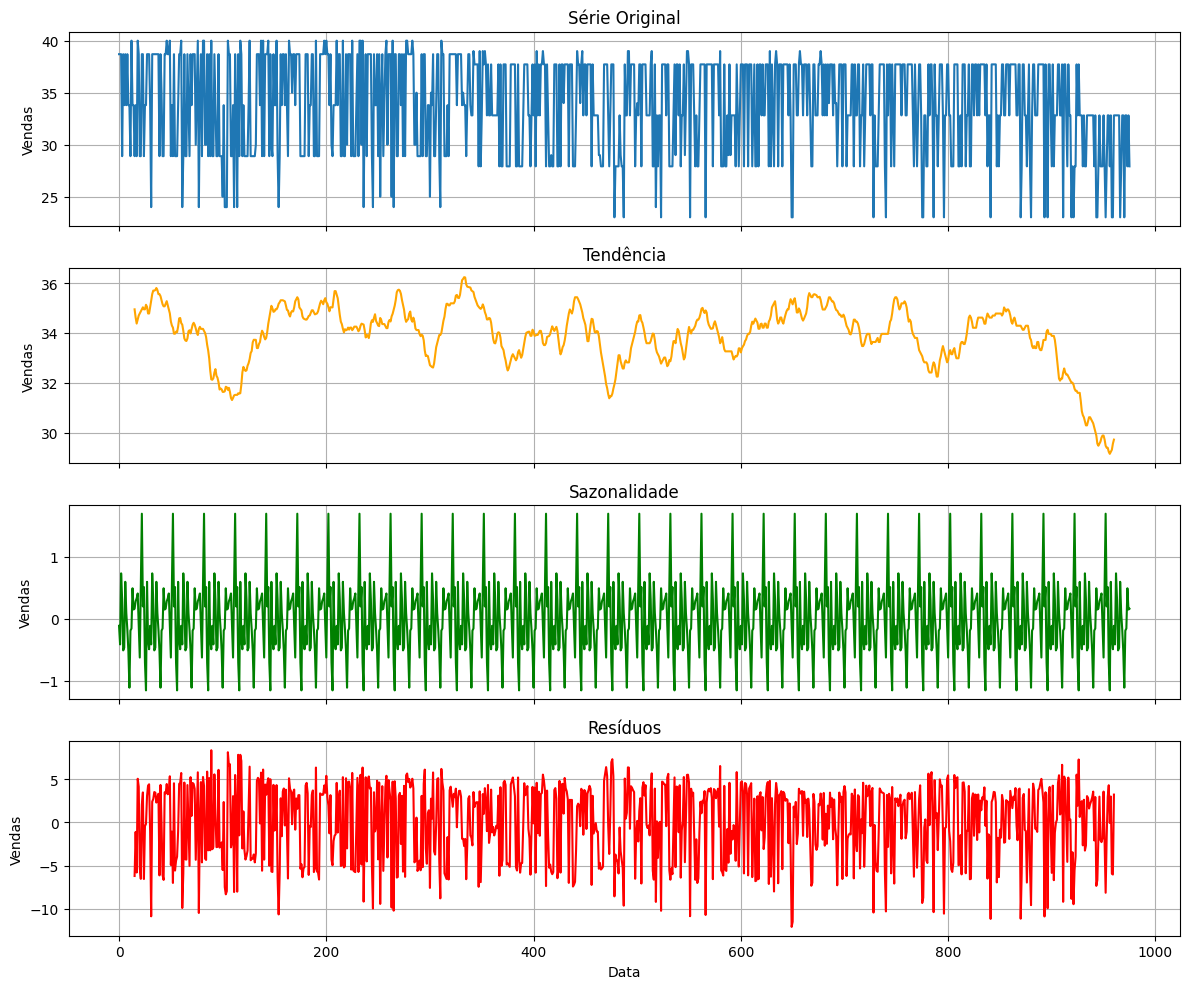

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição da série temporal
result = seasonal_decompose(data['money'], model='additive', period=30)

# Configurar o layout dos gráficos
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot da série original
ax1.plot(result.observed, label='Série Original')
ax1.set_title('Série Original')
ax1.set_ylabel('Vendas')
ax1.grid(True)

# Plot da tendência
ax2.plot(result.trend, label='Tendência', color='orange')
ax2.set_title('Tendência')
ax2.set_ylabel('Vendas')
ax2.grid(True)

# Plot da sazonalidade
ax3.plot(result.seasonal, label='Sazonalidade', color='green')
ax3.set_title('Sazonalidade')
ax3.set_ylabel('Vendas')
ax3.grid(True)

# Plot dos resíduos
ax4.plot(result.resid, label='Resíduos', color='red')
ax4.set_title('Resíduos')
ax4.set_ylabel('Vendas')
ax4.set_xlabel('Data')
ax4.grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()


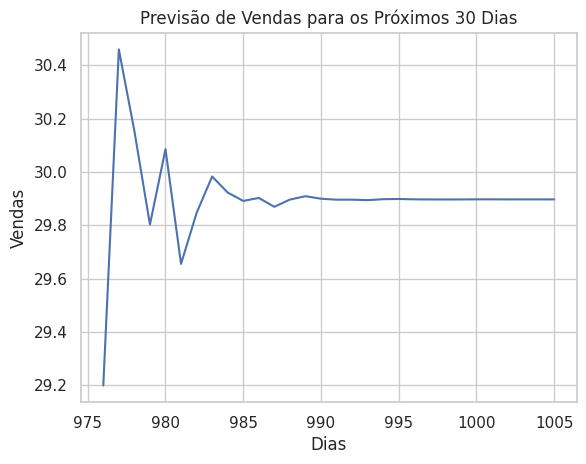

In [ ]:
# Previsão de Vendas para os Próximos 30 Dias
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['money'], order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)
forecast.plot()
plt.title('Previsão de Vendas para os Próximos 30 Dias')
plt.xlabel('Dias')
plt.ylabel('Vendas')
plt.show()